In [3]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.9 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [click]
   -------------------- ------------------- 2/4 [click]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import pandas as pd
import nltk
#nltk.download('all')
from nltk.tokenize import sent_tokenize, word_tokenize
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding
from sklearn.model_selection import train_test_split
import numpy as np

# Data Processing

In [7]:
# load data
text = ""

with open("Training_Data\\01 Harry Potter and the Sorcerers Stone.txt", encoding="utf-8") as file:
    text = file.read()
    file.close()
with open("Training_Data\\02 Harry Potter and the Chamber of Secrets.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("Training_Data\\03 Harry Potter and the Prisoner of Azkaban.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("Training_Data\\04 Harry Potter and the Goblet of Fire.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("Training_Data\\05 Harry Potter and the Order of the Phoenix.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("Training_Data\\06 Harry Potter and the Half-Blood Prince.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("Training_Data\\07 Harry Potter and the Deathly Hallows.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("Training_Data\\percy_jackson_book_1.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("Training_Data\\percy_jackson_book_2.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("Training_Data\\percy_jackson_book_3.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("Training_Data\\percy_jackson_book_4.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("Training_Data\\percy_jackson_book_5.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()

text = text.lower()
sentences = sent_tokenize(text)
print("Number of Sentences for training: ", len(sentences))

Number of Sentences for training:  106769


# Tokenization and Input Output Mapping

In [9]:
# numerical symbols
count = 0
mapping = {}
for sentence in sentences:
    words = word_tokenize(sentence)
    for word in words:
        if word not in list(mapping.keys()):
            mapping[word] = count
            count += 1



In [10]:
print("Number of Words for training: ", len(list(mapping.keys())))

Number of Words for training:  37755


In [69]:
# sliding window, input and labels
n = 15
X = []
Y = []

for sentence in sentences:

    words = word_tokenize(sentence)
    
    count = 0

    while n+count < len(words):
        input = []
        for word in range(count, n+count):
            num = mapping[words[word]]
            input.append(num)
        X.append(input)
        Y.append(mapping[words[n+count]])
        count+=1


# Data split

In [71]:
# split data into training and testing sets
print("Total Input Data: ", len(X))
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2)
X_Train = np.array(X_Train)
X_Test = np.array(X_Test)
Y_Train = np.array(Y_Train)
Y_Test = np.array(Y_Test)

"""input = np.concatenate([np.array(X_Train).flatten(), np.array(Y_Train)])
input = np.unique(input)"""
input_dim = np.max(X_Train)+1
print(input_dim)
print(len(X_Train), len(X_Test))

Total Input Data:  675113
37755
540090 135023


# Model Load and Train

In [73]:
epochs = 12
batch_size = 64
lstm_layers = 1
lstm_units = 128

In [74]:
# load model and define architecture
model = Sequential([
    Embedding(input_dim = input_dim, output_dim = 64),
    LSTM(128),
    Dense(units = input_dim, activation = 'softmax')
])

In [75]:
# compile model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# feed data to model - training and validation
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_Train, Y_Train, epochs = 12, validation_split = 0.2, callbacks = [early_stop], batch_size=64)

Epoch 1/12
6752/6752 ━━━━━━━━━━━━━━━━━━━━ 1141s 168ms/step - accuracy: 0.1079 - loss: 6.3491 - val_accuracy: 0.1904 - val_loss: 5.2755
Epoch 2/12
6752/6752 ━━━━━━━━━━━━━━━━━━━━ 1002s 148ms/step - accuracy: 0.2008 - loss: 5.0052 - val_accuracy: 0.2112 - val_loss: 5.0602
Epoch 3/12
6752/6752 ━━━━━━━━━━━━━━━━━━━━ 1021s 151ms/step - accuracy: 0.2269 - loss: 4.6085 - val_accuracy: 0.2199 - val_loss: 4.9863
Epoch 4/12
6752/6752 ━━━━━━━━━━━━━━━━━━━━ 1090s 161ms/step - accuracy: 0.2464 - loss: 4.3379 - val_accuracy: 0.2257 - val_loss: 4.9905
Epoch 5/12
6752/6752 ━━━━━━━━━━━━━━━━━━━━ 1244s 184ms/step - accuracy: 0.2626 - loss: 4.1040 - val_accuracy: 0.2268 - val_loss: 5.0178
Epoch 6/12
6752/6752 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.2780 - loss: 3.8986

# Model Testing

In [78]:
# accuracy check
test_loss, test_accuracy = model.evaluate(X_Test, Y_Test)
print(test_accuracy)

4220/4220 ━━━━━━━━━━━━━━━━━━━━ 145s 34ms/step - accuracy: 0.2244 - loss: 5.0608
0.22418402135372162


# Comparing Accuracies

In [80]:
# Uncomment when have to create new model comparision file

"""import pandas as pd
df = pd.DataFrame({
    'window size': []
    'batch_size': [],
    'epochs': [],
    'LSTM Layers': [],
    'LSTM Units': [],
    'Training Accuracy': [],
    'Validation Accuracy': [],
    'Testing Accuracy': []
})
df.to_csv('Model_Comparisions.csv', index = 'False')"""

"import pandas as pd\ndf = pd.DataFrame({\n    'window size': []\n    'batch_size': [],\n    'epochs': [],\n    'LSTM Layers': [],\n    'LSTM Units': [],\n    'Training Accuracy': [],\n    'Validation Accuracy': [],\n    'Testing Accuracy': []\n})\ndf.to_csv('Model_Comparisions.csv', index = 'False')"

In [90]:
new_data = pd.DataFrame([{
    'window_size': n,
    'batch_size': batch_size,
    'epochs': epochs,
    'LSTM Layers': lstm_layers,
    'LSTM Units': lstm_units,
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Testing Accuracy': test_accuracy}])

In [92]:
# save comparisions
df = pd.read_csv("C:\\Users\\Hp\\Documents\\Javeria\\Studies\\Generative_AI_Project\\Model_Comparisions.csv")
df = pd.concat([df, new_data], ignore_index=True)
df.to_csv('Model_Comparisions.csv', index = 'False')

# Plots

In [95]:
import matplotlib.pyplot as plt

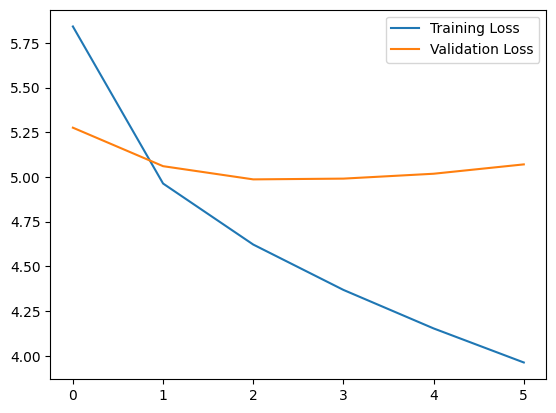

In [97]:
# graphs
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()

In [98]:
# save model
model.save('model.keras')

In [101]:
# Load Model and Test

In [187]:
model = load_model('model.keras')
incomplete_sent = input("Enter at least 7 words: ")
sentence = incomplete_sent
incomplete_sent = incomplete_sent.lower()

word = ""

while (word != '.'):
    
    words = word_tokenize(incomplete_sent)
    inp = [mapping[word] for word in words]
    inp = np.array([inp])
    output = model.predict(inp)
    
    predicted = np.argmax(output[0])
    
    reverse_map = {token:word for word, token in mapping.items()}
    word = reverse_map[predicted] 

    incomplete_sent += f" {word}"
    incomplete_sent = incomplete_sent[1:] 

    if word == '.' or word == ',':
        sentence += f"{word}"
    else:
        sentence += f" {word}"

print(sentence)

Enter at least 7 words:  She opened the book and began


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
She opened the book and began to see it.
